In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [2]:
def polynomial(x):
  return 5*(x**3) -8*(x**2) -7*x +1

In [3]:
x_train = np.random.uniform(-20,20,5000)
print( "max number :",max(x_train))

max number : 19.998897385753295


In [4]:
y_train = polynomial(x_train)

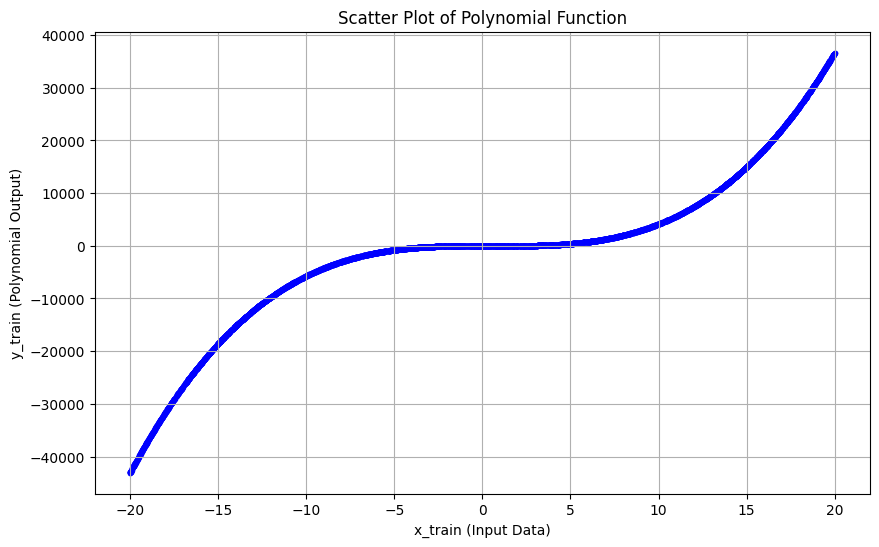

In [5]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with customized markers and color
plt.scatter(x_train, y_train, marker='.', color='b')

# Title and labels
plt.title('Scatter Plot of Polynomial Function')
plt.xlabel('x_train (Input Data)' )
plt.ylabel('y_train (Polynomial Output)' )

# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.show()


## normalize the value

In [6]:
x_max = max(x_train)
x_min = min(x_train)
y_max = max(y_train)
y_min = min(y_train)

In [7]:
x_train = 2*((x_train - x_min)/(x_max - x_min)) - 1
y_train = 2*((y_train - y_min)/(y_max - y_min)) - 1

In [8]:
print(min(x_train))
print(max(x_train))
print(min(y_train))
print(max(y_train))

-1.0
1.0
-1.0
1.0


In [9]:
size = len(x_train)
print(size)

5000


In [10]:
x_train_data = x_train[:int(size*0.90)]
y_train_data = y_train[:int(size*0.90)]

x_val = x_train[int(size*0.90):int(size*0.95)]
y_val = y_train[int(size*0.90):int(size*0.95)]

x_test = x_train[int(size*0.95):]
y_test = y_train[int(size*0.95):]

In [11]:
len(x_val)

250

In [12]:

inputs = Input((1,))
h1 = Dense(32, activation = "relu")(inputs)
h2 = Dense(64, activation = "relu")(h1)
h3 = Dense(128, activation = "relu")(h2)
outputs = Dense(1, name = 'OutputLayer')(h3)

model = Model(inputs, outputs, name = 'Simple_deep_neural_network')
model.summary()

Model: "Simple_deep_neural_network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow import keras

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.R2Score(name='accuracy')])
# early_stop = keras.callbacks.EarlyStopping(
#     monitor = "val_loss",
#     patience = 5
# )

In [15]:
history = model.fit(x_train_data, y_train_data, epochs = 20,  validation_data=(x_val, y_val))

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7357 - loss: 0.0366 - val_accuracy: 0.9912 - val_loss: 0.0013
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9954 - loss: 6.2329e-04 - val_accuracy: 0.9981 - val_loss: 2.7474e-04
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9989 - loss: 1.5336e-04 - val_accuracy: 0.9997 - val_loss: 4.6676e-05
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 4.5292e-05 - val_accuracy: 0.9998 - val_loss: 2.4547e-05
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 2.9334e-05 - val_accuracy: 0.9998 - val_loss: 3.5407e-05
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 2.6580e-05 - val_accuracy: 0.9997 - val_loss: 4.5528e-05
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 2.9439e-05 - val_accuracy: 0.9999 - val_loss: 9.1459e-06
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

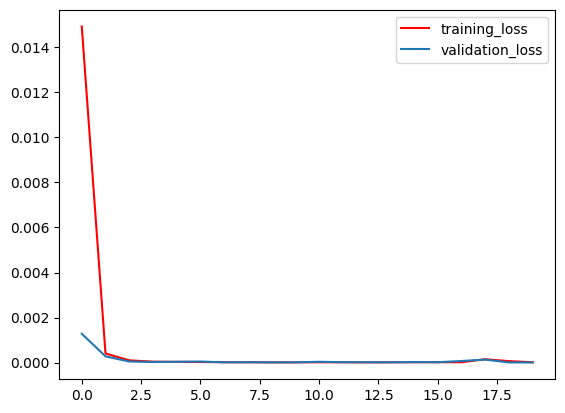

In [16]:
plt.plot(history.history['loss'],color='red',label='training_loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.legend()

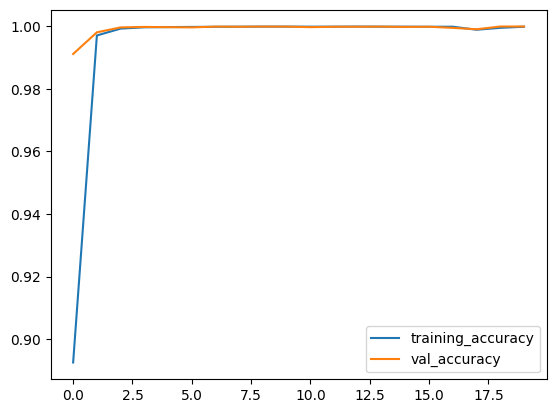

In [17]:
plt.plot(history .history['accuracy'],label = 'training_accuracy')
plt.plot(history.history['val_accuracy'],label ='val_accuracy')
plt.legend()
plt.show()

In [18]:
y_pred_test = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [19]:
print(y_pred_test[:11])

[[ 0.07715959]
 [-0.29205745]
 [ 0.61180717]
 [ 0.28275964]
 [-0.6581621 ]
 [ 0.321301  ]
 [ 0.0792898 ]
 [ 0.08058444]
 [-0.31937513]
 [ 0.04964731]
 [ 0.6936682 ]]


In [20]:
x_test_true = ((x_test + 1) * (x_max - x_min) / 2) + x_min
y_test_true = ((y_test + 1) * (y_max - y_min) / 2) + y_min
y_pred_true = ((y_pred_test + 1) * (y_max - y_min) / 2) + y_min

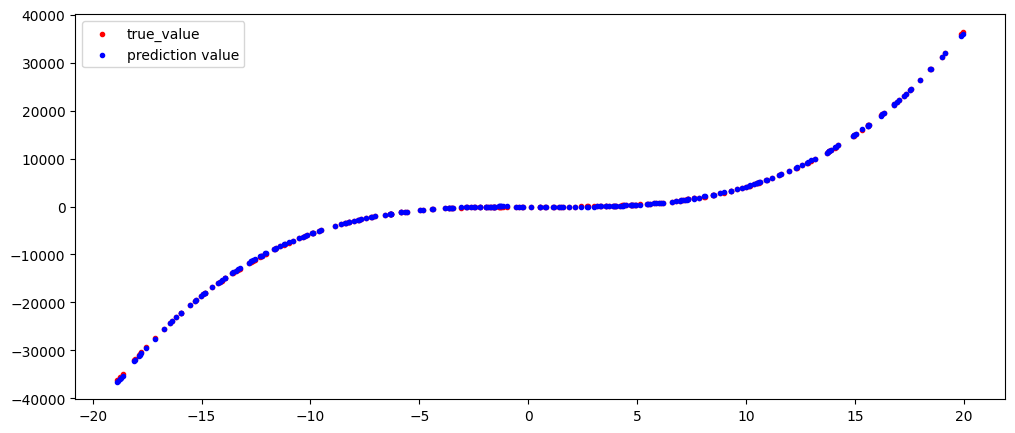

In [21]:
plt.figure(figsize=(12,5))
plt.scatter(x_test_true, y_test_true, c='red', label='true_value', marker='.')
plt.scatter(x_test_true, y_pred_true, c='blue', label='prediction value', marker='.')

plt.legend()

In [23]:
print('Actual X Value: ', x_test_true[10])
print('Actual Y Value: ', y_test_true[10])
print('Predicted Y Value: ', y_pred_true[10])

Actual X Value:  17.563949060871487
Actual Y Value:  24501.829698768386
Predicted Y Value:  [24450.129]
